In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse_raw_position(data):
    data[['alpha', 'delta']] = (
        data['raw position']
        .str.split(expand=True)
        .astype(float)
    )
    
    data.drop('raw position', axis=1, inplace=True)

    return data


In [3]:
def convert_to_degrees(data):
    columns = ['parallax', 'proper motion alpha', 'proper motion delta',
               'error alpha', 'error delta', 'error parallax',
               'error motion alpha', 'error motion delta']

    for column in columns:
        data[column] = data[column].astype(float) / 3600000.0
        
    return data


In [4]:
def parse_input_file(filename):
    data = pd.read_csv(filename, delimiter='|', engine='python',
                       skiprows=11,
                       skipfooter=1,
                       index_col=0,
                       header=0,
                       usecols=[1, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16],
                       names=['index', 'magnitude', 'raw position', 'parallax',
                              'proper motion alpha', 'proper motion delta',
                              'error alpha', 'error delta', 'error parallax',
                              'error motion alpha', 'error motion delta'])

    data = parse_raw_position(data)
    data.dropna(inplace=True)
    data = convert_to_degrees(data)
    data['magnitude'] = data['magnitude'].astype(float)
    
    return data


In [5]:
data = parse_input_file('data.dat')

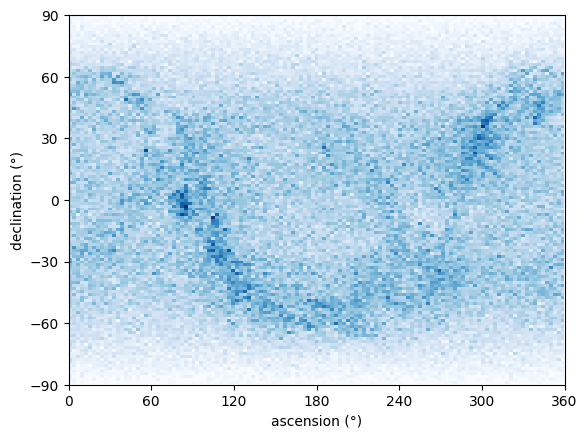

In [6]:
plt.hist2d(data['alpha'], data['delta'], bins=125, cmap='Blues')
plt.xlabel('ascension (°)')
plt.ylabel('declination (°)')
plt.xticks([0, 60, 120, 180, 240, 300, 360])
plt.yticks([-90, -60, -30, 0, 30, 60, 90])
plt.show()

In [7]:
data['distance'] = 1.58125e-5 / np.deg2rad(data[data['parallax'] > 1e-7]['parallax'])

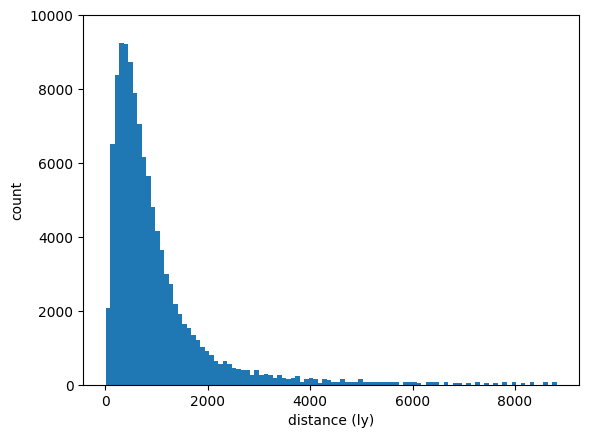

In [9]:
plt.hist(data['distance'], bins=100)
plt.xlabel('distance (ly)')
plt.ylabel('count')
plt.ylim([0, 10000])
plt.show()

In [10]:
visible = data[data['magnitude'] < 6.5]

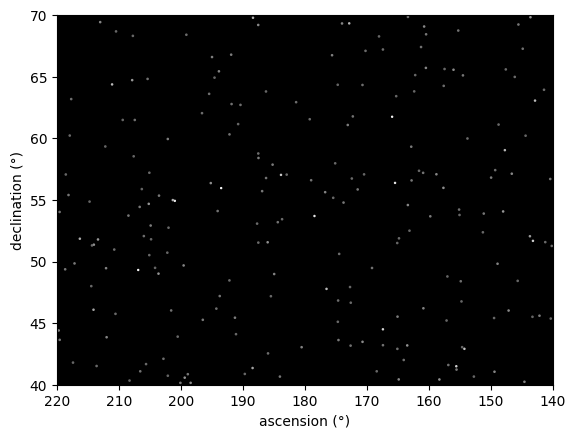

In [11]:
brightness = np.power(
    10, -(visible['magnitude'] - visible['magnitude'].min()) / 10)
brightness = (1 - brightness).to_numpy()
plt.scatter(visible['alpha'], visible['delta'], c=brightness, s=brightness * 4,
            cmap='Greys', marker='.', vmin=0.5, vmax=1.0)
plt.xlim([220, 140])
plt.ylim([40, 70])
plt.xlabel('ascension (°)')
plt.ylabel('declination (°)')
ax = plt.gca()
ax.set_facecolor((0.0, 0.0, 0.0))
plt.show()
